# The Sparks Foundation-GRIP - Data science and Business Analytics - March'2022

## Author : Ritwik Chouhan

## Task 1 : Prediction Using Supervised ML

### Dataset Used : It can be downloaded through the following link < http://bit.ly/w-data


#### Predict the percentage of marks of the students based on the number of hours they studied 



In [44]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as mtp
import seaborn as sns
import sklearn.linear_model as LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


# Step 1. Reading the data

In [2]:
dataset= pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [3]:
dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
#check if there is any null value in data set
dataset.isnull == True

False

###  There is no null value in the dataset so we can now visualize data

<function matplotlib.pyplot.show(close=None, block=None)>

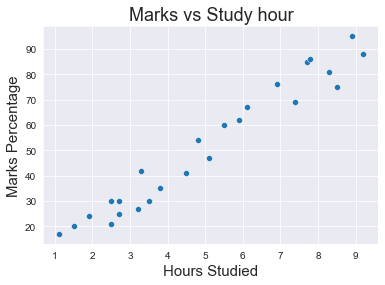

In [5]:
sns.set_style('darkgrid')
sns.scatterplot(y=dataset['Scores'], x=dataset['Hours'])
mtp.title('Marks vs Study hour', size=18)
mtp.xlabel('Hours Studied', size=15)
mtp.ylabel('Marks Percentage', size=15)
mtp.show



#### From the above scatter plot there looks to be correlation between the Marks percentage and Hours studies. Lets plot a regression line to confirm the correlation

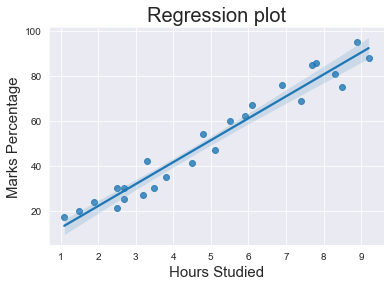

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [6]:
sns.regplot(y=dataset['Scores'], x=dataset['Hours'])
mtp.title('Regression plot', size=20 )
mtp.xlabel('Hours Studied', size=15)
mtp.ylabel('Marks Percentage', size=15)
mtp.show()
print(dataset.corr())


#### It is confirmed that variables are positively correlated 

# Step 2. Training the model

### Splitting the data

In [29]:
x=dataset.iloc[:,:-1].values


In [30]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [31]:
y=dataset.iloc[:,1]

In [32]:
y

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

In [33]:
x_train, x_test, y_train, y_test= train_test_split(x,y,random_state=0)

### Fitting the data into model

In [34]:
from sklearn.linear_model import  LinearRegression

In [35]:
regression= LinearRegression()
regression.fit(x_train,y_train)
print("-----Model trained-----")

-----Model trained-----


## Predicting the percentage of marks

In [36]:
y_pred= regression.predict(x_test)


In [38]:
prediction = pd.DataFrame({'Hours': [i[0] for i in x_test], 'Predicted Marks': [m for m in y_pred]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


# Step 3. Comapring the predicted Marks with Actual marks

In [40]:
cmp= pd.DataFrame({'Actucal marks': y_test, 'Predicted Marks': y_pred})

In [41]:
cmp

,Actucal marks,Predicted Marks
5,20,16.844722
2,27,33.745575
19,69,75.500624
16,30,26.786400
11,62,60.588106
22,35,39.710582
17,24,20.821393


# Step 4. Visually Comparing the Predicted Marks with the actual marks

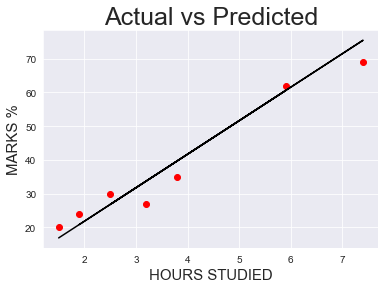

In [42]:
mtp.scatter(x= x_test, y= y_test, color= 'Red')
mtp.plot(x_test, y_pred, color='Black')
mtp.title('Actual vs Predicted', size=25)
mtp.ylabel('MARKS %', size=15)
mtp.xlabel('HOURS STUDIED', size=15)
mtp.show()

# Step 5. Evaluating the model

## Calculating the accuracy of the model

In [46]:
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))

Mean absolute error: 4.130879918502486


In [48]:
## So there is small value of Mean absolute error which shows the chance of error are very less.

### What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [53]:
hours= [9.25]
answer= regression.predict([hours])
print('Score= {}'.format(round(answer[0],3)))

Score= 93.893


In [54]:
## According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.